In [0]:
!pip install tensorflow-gpu==2.0.0 --upgrade

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
dataset = pd.read_csv(dataset_path)

x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

y_train = x_train.pop('Outcome')
y_test = x_test.pop('Outcome')

In [3]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [4]:
y_train.value_counts()

0    347
1    191
Name: Outcome, dtype: int64

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train[x_train.columns] = sc.fit_transform(x_train)
x_test[x_train.columns] = sc.transform(x_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [0]:
model = Sequential()
model.add(Dense(256,activation='relu', input_shape=[8])) # first hidden layer
model.add(Dense(128,activation='relu', kernel_regularizer=l2(l=0.001)))
model.add(Dense(64,activation='relu', kernel_regularizer=l2(l=0.001)))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 0)

history = model.fit(x_train, y_train, 
                    epochs = 100, 
                    validation_split=0.3,
                    # verbose = 0,
                    callbacks = [earlystopping])

Train on 376 samples, validate on 162 samples
Epoch 1/100
376/376 [==============================] - 0s 583us/sample - loss: 0.9025 - accuracy: 0.6543 - val_loss: 0.8833 - val_accuracy: 0.6111
Epoch 2/100
376/376 [==============================] - 0s 126us/sample - loss: 0.8293 - accuracy: 0.6596 - val_loss: 0.8181 - val_accuracy: 0.6173
Epoch 3/100
376/376 [==============================] - 0s 134us/sample - loss: 0.7736 - accuracy: 0.6702 - val_loss: 0.7624 - val_accuracy: 0.6543
Epoch 4/100
376/376 [==============================] - 0s 136us/sample - loss: 0.7248 - accuracy: 0.6941 - val_loss: 0.7150 - val_accuracy: 0.6728
Epoch 5/100
376/376 [==============================] - 0s 113us/sample - loss: 0.6736 - accuracy: 0.7181 - val_loss: 0.6817 - val_accuracy: 0.6852
Epoch 6/100
376/376 [==============================] - 0s 108us/sample - loss: 0.6423 - accuracy: 0.7314 - val_loss: 0.6375 - val_accuracy: 0.7284
Epoch 7/100
376/376 [==============================] - 0s 108us/sample -

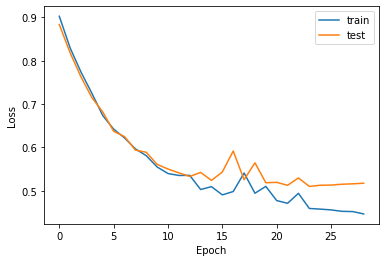

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

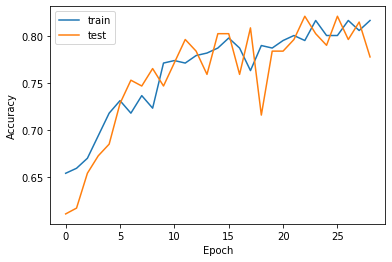

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='train')
plt.plot(epoch,val_acc,label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
model.evaluate(x_test, y_test)

230/230 [==============================] - 0s 100us/sample - loss: 0.5835 - accuracy: 0.7304


[0.583497020472651, 0.7304348]

In [13]:
probs = model.predict(x_test)

In [14]:
probs[:10]

array([[0.03800765],
       [0.9134079 ],
       [0.28036374],
       [0.25280648],
       [0.68834424],
       [0.5119146 ],
       [0.27934033],
       [0.03874558],
       [0.04845819],
       [0.76041377]], dtype=float32)

In [0]:
# threshold of 0.5
preds = probs.flatten().round()

In [21]:
preds

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1.

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.7304347826086957

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[129,  24],
       [ 38,  39]])

### Set mean as threshold

In [34]:
threshold = y_train.mean()
threshold

0.3550185873605948

In [35]:
prob = 0.2
pred = 0 if prob < threshold else 1
pred

0

In [0]:
preds = [0 if prob < threshold else 1 for prob in probs]

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.7434782608695653

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[120,  33],
       [ 26,  51]])